In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
plot2 = pd.read_csv('data-plot-2.csv')
plot3 = pd.read_csv('data-plot-3.csv')
plot4 = pd.read_csv('data-plot-4.csv')

In [93]:
aqi_2022 = pd.concat([plot2,plot3,plot4], axis=0).reset_index()

In [94]:
aqi_2022 = aqi_2022.rename(columns={'Date and Time': 'datetime', 'PM<sub>10</sub>': 'pm10', 'PM<sub>2.5</sub>': 'pm2.5'})

In [95]:
aqi_2022['datetime'] = pd.to_datetime(aqi_2022['datetime'])

In [96]:
aqi_2022.isna().sum()

index        0
datetime     0
pm10        79
pm2.5       78
dtype: int64

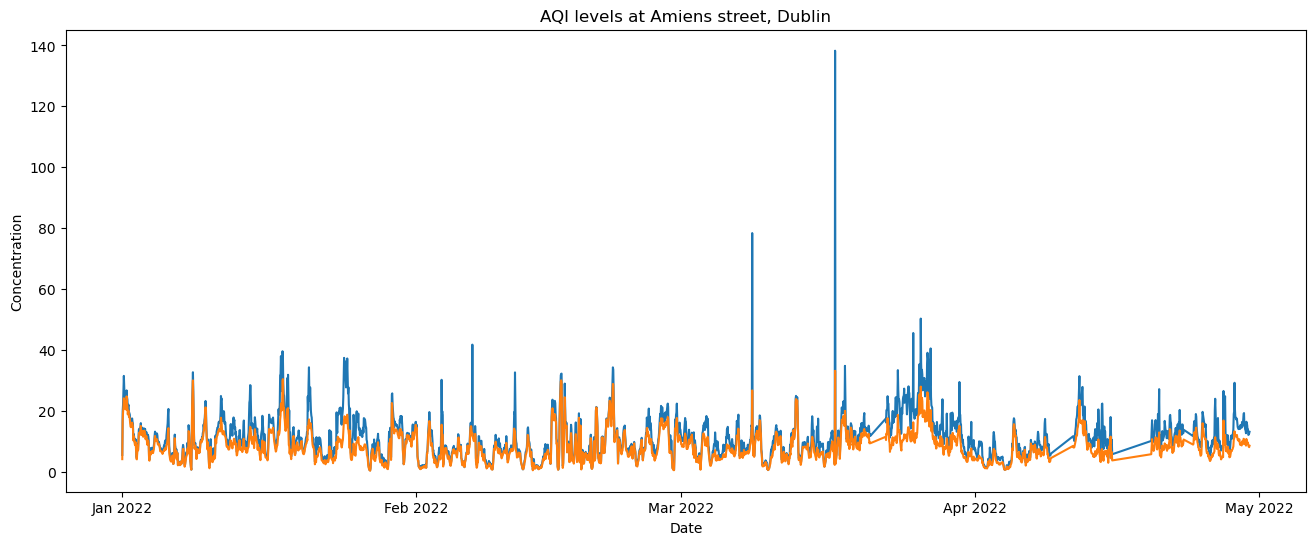

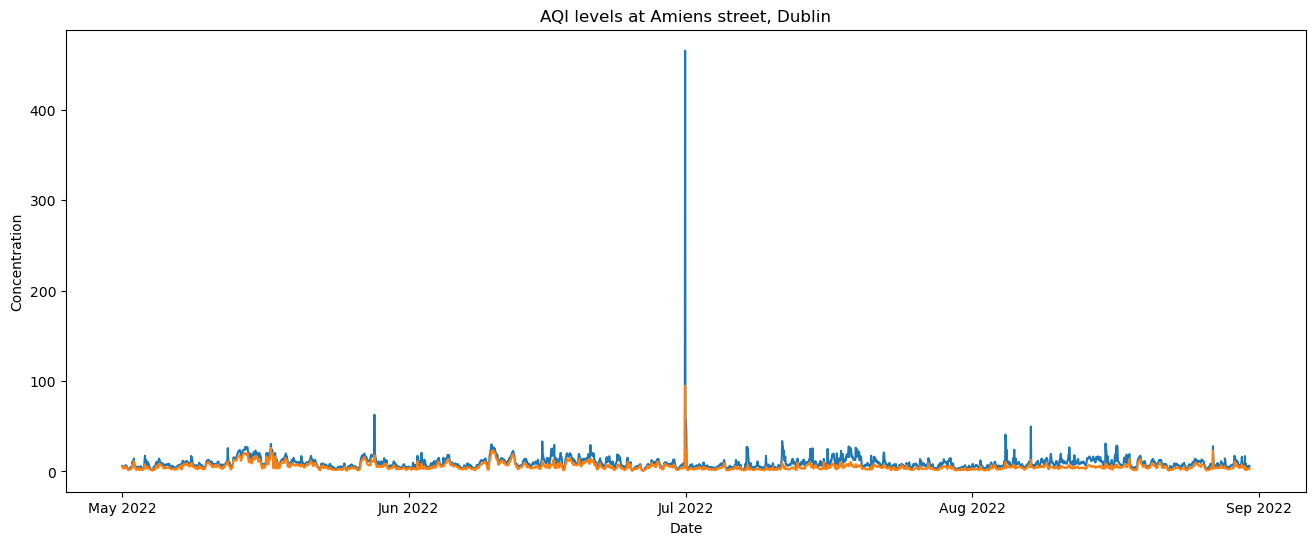

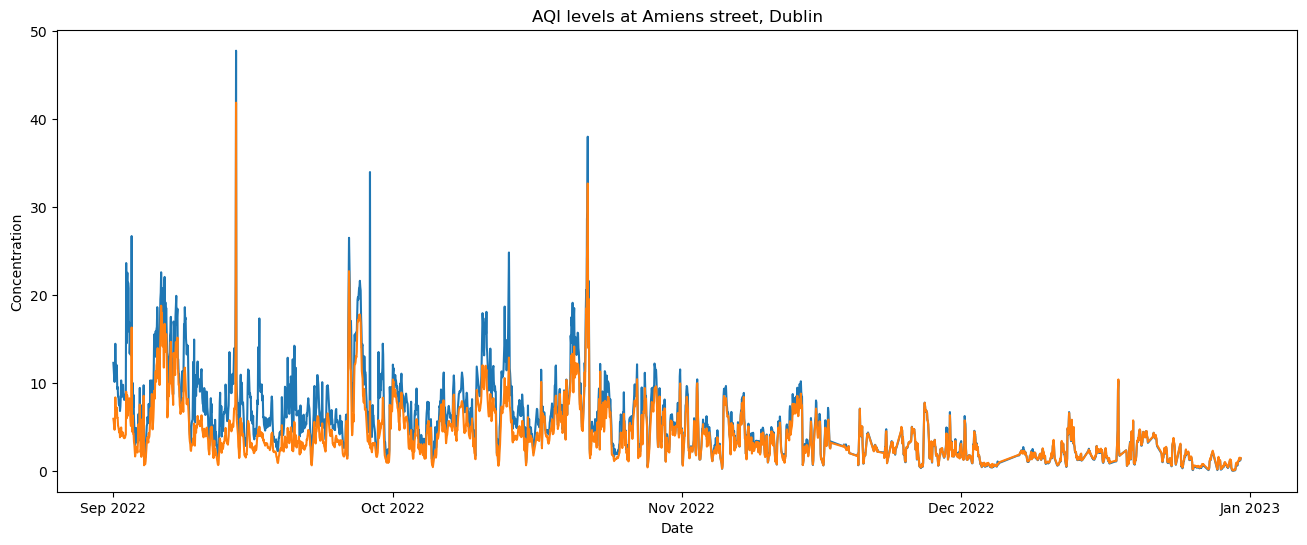

In [129]:
import matplotlib.dates as mdates

def plotline(dataset,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=timeframe, x='datetime', y='pm10')
    sns.lineplot(data=timeframe, x='datetime', y='pm2.5')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.title(title)

    date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
    desired_tick_frequency = mdates.MonthLocator()
    # Apply the tick frequency and formatter to the x-axis
    plt.gca().xaxis.set_major_locator(desired_tick_frequency)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    
    plt.show()

plotline(aqi_2022,'2022-01-01', '2022-04-30', 'AQI levels at Amiens street, Dublin')

plotline(aqi_2022,'2022-05-01', '2022-08-31', 'AQI levels at Amiens street, Dublin')

plotline(aqi_2022,'2022-09-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plt.show()

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2799/4237818761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe['datetime'] = timeframe['datetime'].dt.strftime('%b')


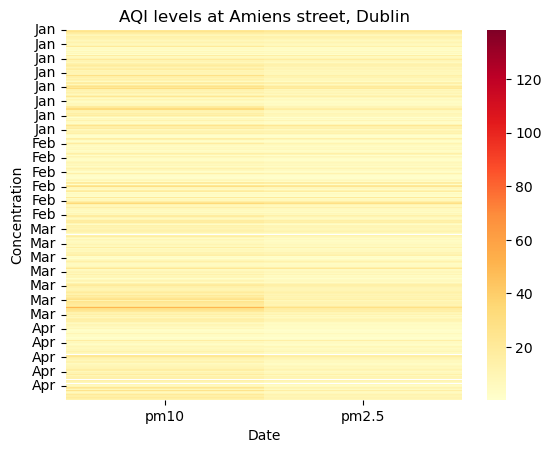

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2799/4237818761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe['datetime'] = timeframe['datetime'].dt.strftime('%b')


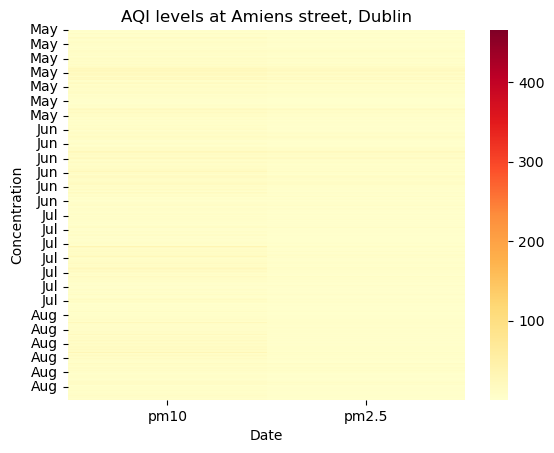

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2799/4237818761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe['datetime'] = timeframe['datetime'].dt.strftime('%b')


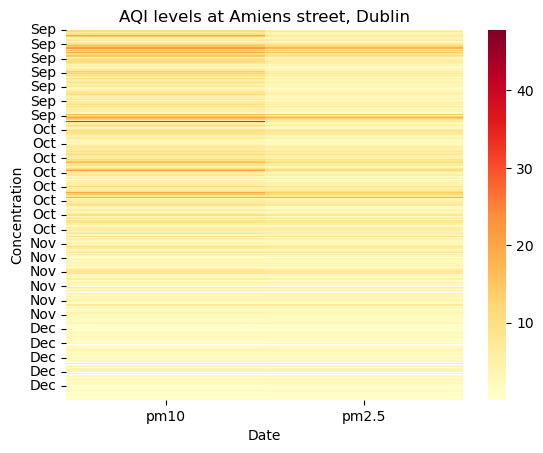

<module 'matplotlib.pyplot' from '/Users/adityapimpalkar/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [131]:

def plotheatmap(dataset, fromtime, to, title):
    dataset = dataset.reset_index()
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    #pivot_df = timeframe.pivot_table(index='datetime', columns='pm10', values='pm2.5')
    timeframe['datetime'] = timeframe['datetime'].dt.strftime('%b')
    
    g = sns.FacetGrid(data, col="datetime")
    
    g.map_dataset(lambda data, color: sns.heatmap(data=timeframe[['pm10', 'pm2.5']], cmap='YlOrRd'))
    
    #timeframe = timeframe.groupby('datetime').aggregate({ 'pm10': 'mean', 'pm2.5': 'mean' })
    #print(timeframe)
    #timeframe = timeframe.set_index('datetime')
    
    #plt.figure(figsize=(16, 6))
    # Create the heatmap using seaborn
    

    
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.title(title)
    
    plt.show()
    return plt

plotheatmap(aqi_2022,'2022-01-01', '2022-04-30', 'AQI levels at Amiens street, Dublin')

plotheatmap(aqi_2022,'2022-05-01', '2022-08-31', 'AQI levels at Amiens street, Dublin')

plotheatmap(aqi_2022,'2022-09-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
